# MCRT Data Blender Generated

Data generated on Blender from script _blender-script.py_

In [1]:
import OpenEXR
import numpy as np
import matplotlib.pyplot as plt
import Imath
import os

In [2]:
def load_exr(exr_path):
    """Load an EXR file and return a numpy array."""
    exr_file = OpenEXR.InputFile(exr_path)
    header = exr_file.header()
    
    # Get image size
    dw = header['dataWindow']
    width = dw.max.x - dw.min.x + 1
    height = dw.max.y - dw.min.y + 1
    
    # Check channels (RGB, R, etc.)
    channels = header['channels']
    print(f"\nFile: {exr_path}")
    print(f"Size: {width}x{height}")
    print("Channels:", list(channels.keys()))
    
    # Read pixel data (assuming 32-bit float)
    pt = Imath.PixelType(Imath.PixelType.FLOAT)
    channel_data = {}
    for channel_name in channels:
        channel_str = exr_file.channel(channel_name, pt)
        channel_data[channel_name] = np.frombuffer(channel_str, dtype=np.float32)
        channel_data[channel_name] = channel_data[channel_name].reshape(height, width)
    
    return channel_data

In [3]:
def visualize_exr(data, title="EXR Channel"):
    """Plot EXR channel data."""
    plt.figure(figsize=(10, 5))
    for i, (channel_name, channel_values) in enumerate(data.items()):
        plt.subplot(1, len(data), i + 1)
        plt.imshow(channel_values, cmap='viridis')
        plt.colorbar(label=channel_name)
        plt.title(f"{title} - {channel_name}")
    plt.tight_layout()
    plt.show()


File: noisy0001.exr
Size: 1920x1080
Channels: ['A', 'B', 'G', 'R']

Channel 'A' stats:
  Min: 1.000
  Max: 1.000
  Mean: 1.000
  Std Dev: 0.000

Channel 'B' stats:
  Min: 0.029
  Max: 0.581
  Mean: 0.083
  Std Dev: 0.095

Channel 'G' stats:
  Min: 0.029
  Max: 0.581
  Mean: 0.083
  Std Dev: 0.095

Channel 'R' stats:
  Min: 0.029
  Max: 0.581
  Mean: 0.083
  Std Dev: 0.095


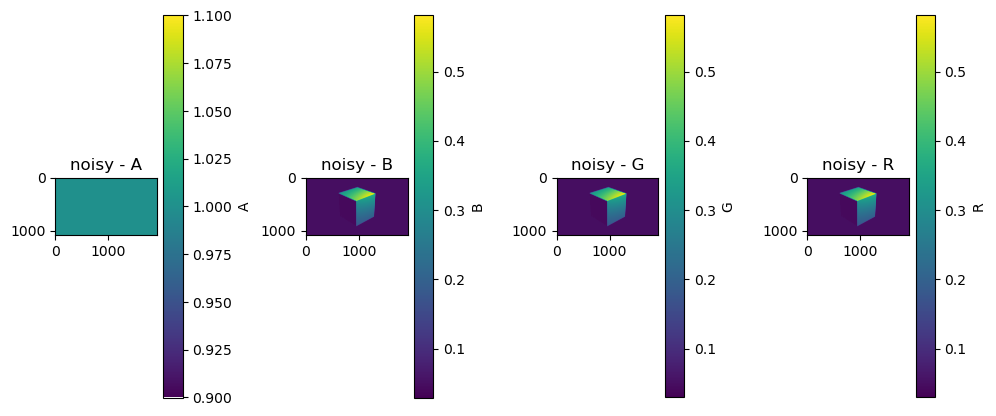


File: albedo0001.exr
Size: 1920x1080
Channels: ['A', 'B', 'G', 'R']

Channel 'A' stats:
  Min: 1.000
  Max: 1.000
  Mean: 1.000
  Std Dev: 0.000

Channel 'B' stats:
  Min: 0.000
  Max: 0.800
  Mean: 0.149
  Std Dev: 0.311

Channel 'G' stats:
  Min: 0.000
  Max: 0.800
  Mean: 0.149
  Std Dev: 0.311

Channel 'R' stats:
  Min: 0.000
  Max: 0.800
  Mean: 0.149
  Std Dev: 0.311


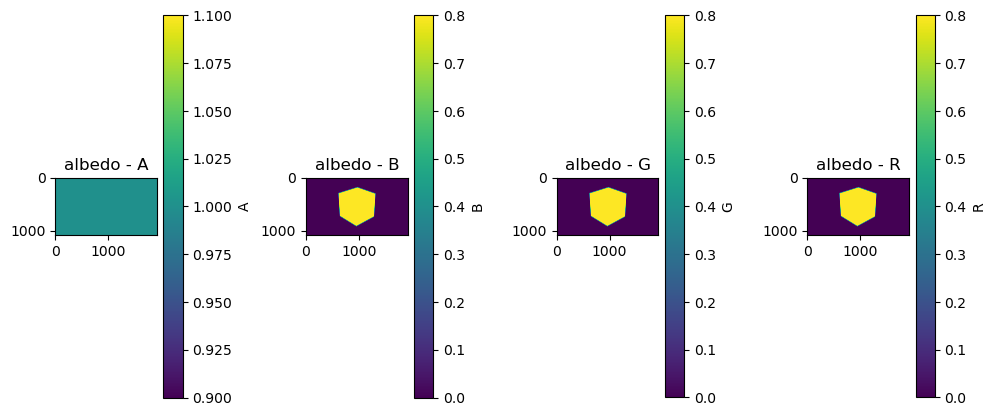


File: normals0001.exr
Size: 1920x1080
Channels: ['B', 'G', 'R']

Channel 'B' stats:
  Min: 0.000
  Max: 1.000
  Mean: 0.044
  Std Dev: 0.204

Channel 'G' stats:
  Min: -1.000
  Max: 0.000
  Mean: -0.068
  Std Dev: 0.252

Channel 'R' stats:
  Min: 0.000
  Max: 1.000
  Mean: 0.074
  Std Dev: 0.261


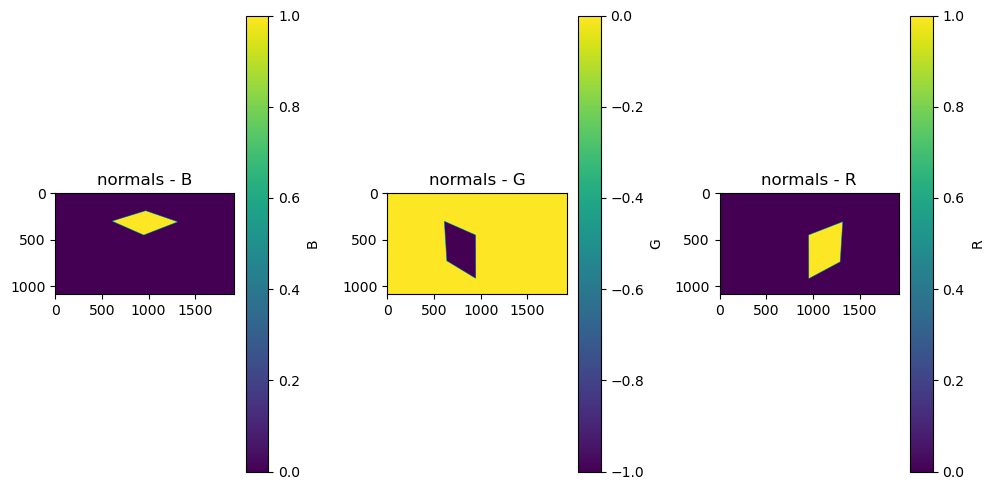


File: depth0001.exr
Size: 1920x1080
Channels: ['B', 'G', 'R']

Channel 'B' stats:
  Min: 9.548
  Max: 10000000000.000
  Mean: 8143342080.000
  Std Dev: 3888369408.000

Channel 'G' stats:
  Min: 9.548
  Max: 10000000000.000
  Mean: 8143342080.000
  Std Dev: 3888369408.000

Channel 'R' stats:
  Min: 9.548
  Max: 10000000000.000
  Mean: 8143342080.000
  Std Dev: 3888369408.000


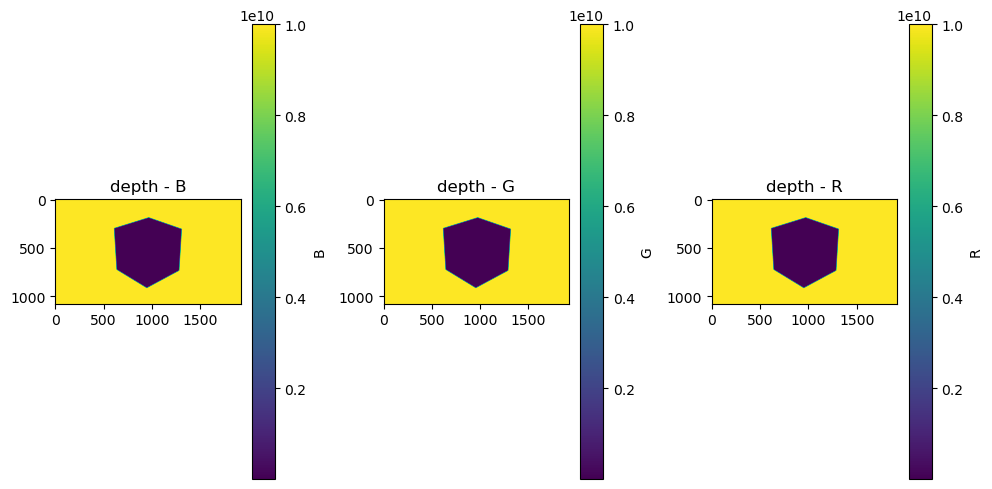

In [4]:
# Paths to your EXR files
files = {
    "noisy": "noisy0001.exr",
    "albedo": "albedo0001.exr",
    "normals": "normals0001.exr",
    "depth": "depth0001.exr"
}

# Load and analyze each file
for name, path in files.items():
    try:
        # Load EXR
        exr_data = load_exr(os.path.expanduser(path))
        
        # Print statistics for each channel
        for channel, values in exr_data.items():
            print(f"\nChannel '{channel}' stats:")
            print(f"  Min: {np.min(values):.3f}")
            print(f"  Max: {np.max(values):.3f}")
            print(f"  Mean: {np.mean(values):.3f}")
            print(f"  Std Dev: {np.std(values):.3f}")
        
        # Visualize (for single-channel files like depth, or RGB for noisy/albedo)
        visualize_exr(exr_data, title=name)
        
    except Exception as e:
        print(f"Error loading {path}: {str(e)}")